In [14]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd
import numpy as np
import os
import chart_studio

# Questions to answer

* Which fields have the least debt?
* Which fields get the most financial support?
* Which fields get jobs?
* Which fields have the highest starting salaries?

Needed Tables: 31,38,39,46,55

In [15]:
# Configure chart studio
username = 'joekrinke15'
api_key = '3UIxCNqgl1qv5F4pPY7E'

chart_studio.tools.set_credentials_file(username = username, api_key = api_key)
import chart_studio.plotly as py
import chart_studio.tools as tls


In [16]:
# Load in needed tables
path = r'C:\Users\Joe Krinke\Desktop\Doctoral Data'

table = pd.read_csv(path + '\Doctoral Degree Data.csv')

sankey = pd.read_csv(path + '\Doctoral Sankey.csv')

# Set our colors!

colors = ['rgba(220,249,150,1)', 'rgba(204,235,197, 1)',
          'rgba(168,221,181, 1)', 'rgba(123,204,196, 1)',
          'rgba(67,162,202, 1)','rgba(8,104,172, 1)']


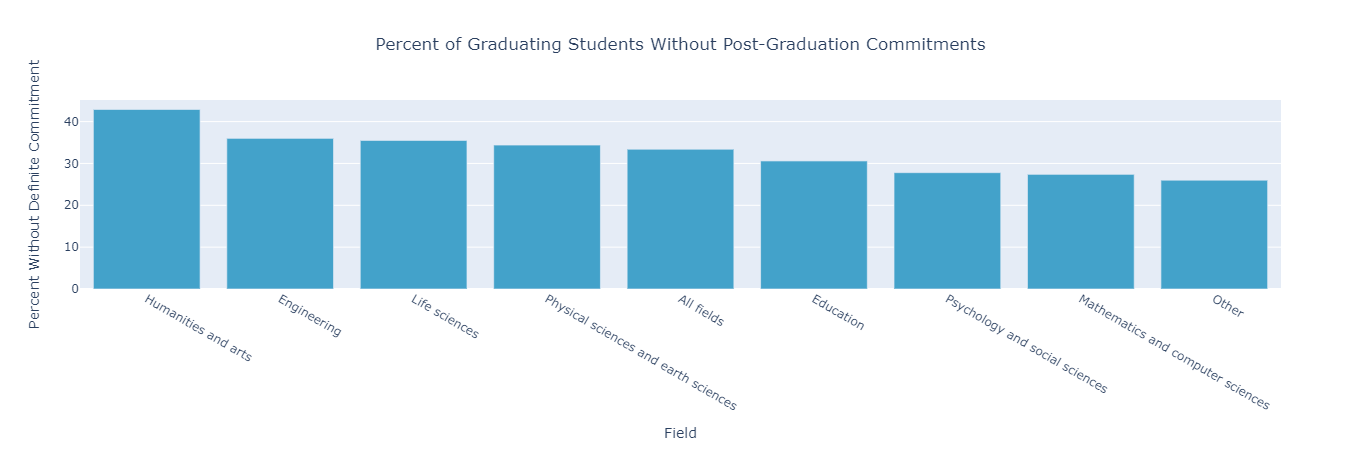

In [17]:
import plotly.graph_objects as go
# Sort data
sort = table.sort_values(by = 'Percent Without Definite Commitment ', ascending = False)
grad_bar = px.bar(sort, 'Field', 'Percent Without Definite Commitment ', title = 'Percent of Graduating Students Without Post-Graduation Commitments')
grad_bar.update_layout(title_x = .5)
grad_bar.update_traces(marker_color=colors[4])
grad_bar.show()

In [18]:
py.plot(grad_bar, title = 'Percent of Graduating Students Without Post-Graduation Commitments')

'https://plotly.com/~joekrinke15/1/'

In [25]:
filter_col = [col for col in table if col.startswith('Primary')]
replace_col = [col.replace('Primary Funding: ', '') for col in filter_col]
funding_data = table[filter_col]

In [26]:
replace_col[1] = replace_col[4]
replace_col[4] = 'Research'

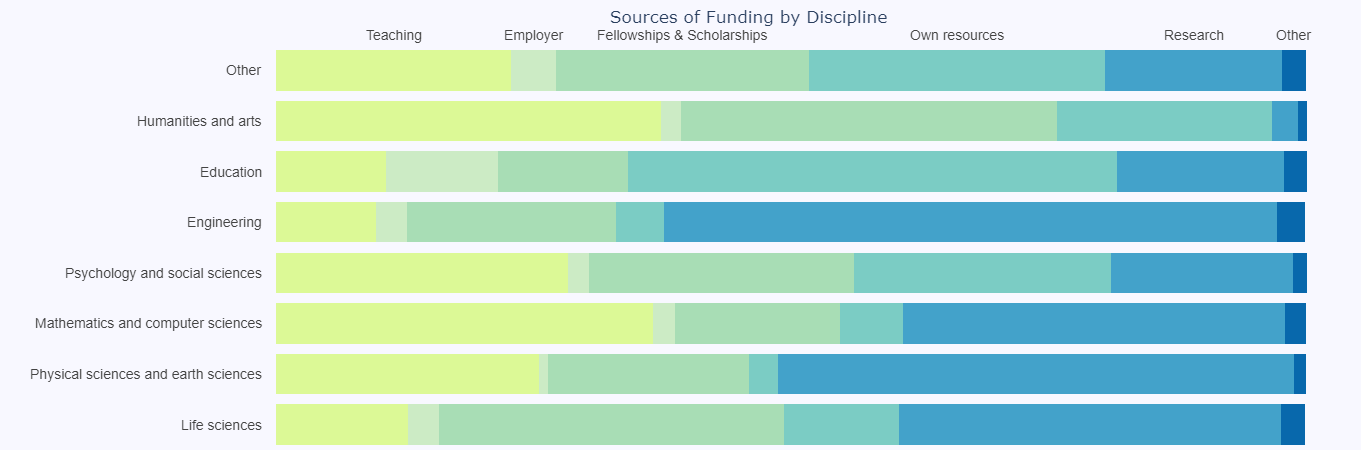

In [27]:
import plotly.graph_objects as go

top_labels = replace_col


x_data = funding_data.to_numpy()[1:,:]
x_data [:,[1, 4]] = x_data[:,[4, 1]]
fields = list(table['Field'])[1:]
y_data = fields

horz_bar = go.Figure()

for i in range(0, len(x_data[0])):
    for xd, yd in zip(x_data, y_data):
        horz_bar.add_trace(go.Bar(
            x=[xd[i]], y=[yd],
            orientation='h',
            marker=dict(
                color=colors[i],
                line=dict(color='rgb(248, 248, 249)', width=0)
            )
        ))

horz_bar.update_layout(
    xaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
        domain=[0.15, 1]
    ),
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
    ),
    barmode='stack',
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    margin=dict(l=85, r=0, t=45, b=0),
    showlegend=False,
)

annotations = []

for yd, xd in zip(y_data, x_data):
    # labeling the y-axis
    annotations.append(dict(xref='paper', yref='y',
                            x=0.14, y=yd,
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=14,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))
    # labeling the first Likert scale (on the top)
    if yd == y_data[-1]:
        annotations.append(dict(xref='x', yref='paper',
                                x=xd[0] / 2, y=1.05,
                                text=top_labels[0],
                                font=dict(family='Arial', size=14,
                                          color='rgb(67, 67, 67)'),
                                showarrow=False))
    space = xd[0]
    for i in range(1, len(xd)):
            # labeling the Likert scale
            if yd == y_data[-1]:
                annotations.append(dict(xref='x', yref='paper',
                                        x=space + (xd[i]/2), y=1.05,
                                        text=top_labels[i],
                                        font=dict(family='Arial', size=14,
                                                  color='rgb(67, 67, 67)'),
                                        showarrow=False))
            space += xd[i]
horz_bar.update_layout(annotations=annotations, width = 1000, title = 'Sources of Funding by Discipline', title_x =.55)
horz_bar.show()

             

In [28]:
py.plot(horz_bar, title = 'Sources of Funding by Discipline')

'https://plotly.com/~joekrinke15/5/'

In [8]:
salary_col = [col for col in table if  ('Salary' in col) or col =='Field']
salary_data = table[salary_col]

In [9]:
salary_data

,Field,Academic Salary,Industry Salary,Government Salary,Nonprofit Salary,Other Salary
0,All fields,"63,000","100,000","80,800","79,000","70,000"
1,Life sciences,"65,000","90,000","72,000","83,000","60,000"
2,Physical sciences and earth sciences,"52,000","100,000","71,600","85,000","48,025"
3,Mathematics and computer sciences,"70,000","125,000","101,000","120,000","65,500"
4,Psychology and social sciences,"63,000","97,000","77,500","75,000","65,000"
5,Engineering,"79,000","102,000","94,500","100,000","85,000"
6,Education,"64,000","80,000","79,000","75,000","75,000"
7,Humanities and arts,"50,000","65,000","67,000","50,000","53,750"
8,Other,"62,000","85,000","88,000","78,500","81,000"


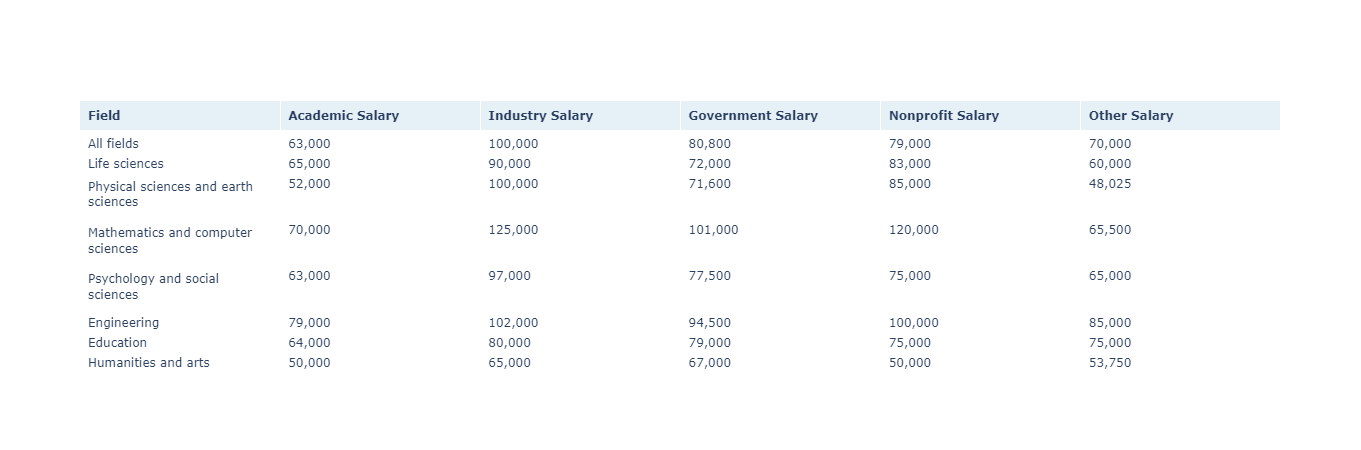

In [33]:
fig = go.Figure(data=[go.Table(
    header=dict(values=list('<b>'+salary_data.columns),
                fill_color= 'rgba(8,104,172, .1)',
                align='left'),
    cells=dict(values=[salary_data['Field'],salary_data['Academic Salary'],salary_data['Industry Salary'],salary_data['Government Salary'],salary_data['Nonprofit Salary'],salary_data['Other Salary']],
               fill_color='white',
               align='left')),
])

fig.show()

In [34]:
py.plot(fig, title = 'Salary Data')

'https://plotly.com/~joekrinke15/14/'

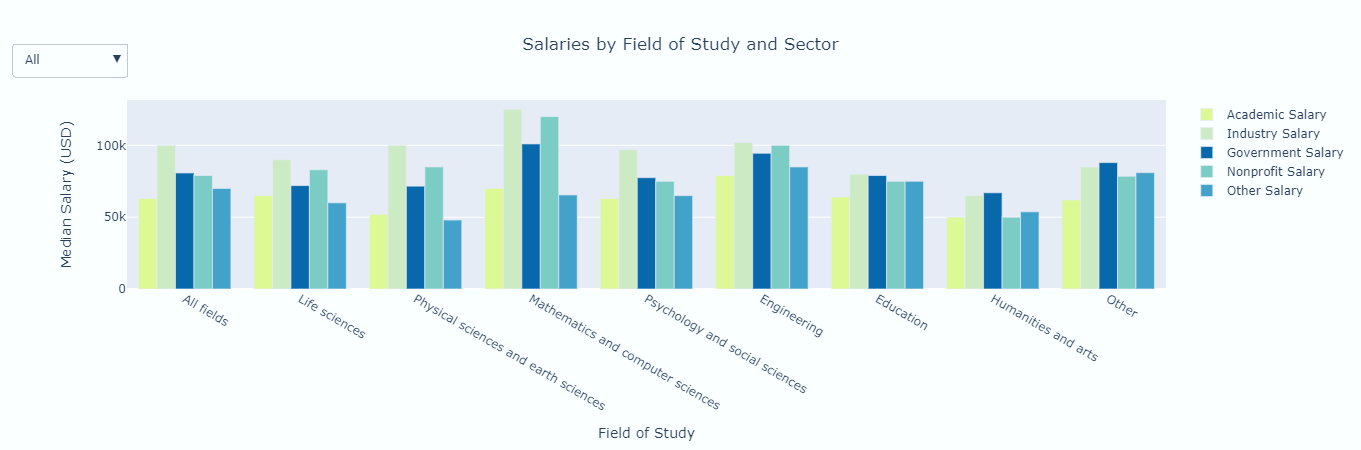

In [29]:
# Subset data by Year

salary = go.Figure()

#Create a trace for each year of interest
#Academic Salary
salary.add_trace(
    go.Bar(x=list(table['Field']),
               y=list(table['Academic Salary']),
               name="Academic Salary",
               marker_color = colors[0]))
#Industry Salary
salary.add_trace(
    go.Bar(x=list(table['Field']),
               y=list(table['Industry Salary']),
               name="Industry Salary", 
          marker_color = colors[1]))
#Government Salary
salary.add_trace(
    go.Bar(x=list(table['Field']),
               y=list(table['Government Salary']),
               name="Government Salary",
           marker_color = colors[5]))
#Nonprofit Salary
salary.add_trace(
    go.Bar(x=list(table['Field']),
               y=list(table['Nonprofit Salary']),
               name="Nonprofit Salary",
          marker_color = colors[3]))
#Other Salary
salary.add_trace(
    go.Bar(x=list(table['Field']),
               y=list(table['Other Salary']),
               name="Other Salary",
          marker_color = colors[4]))
#add buttons

salary.update_layout(
    updatemenus=[
        dict(
            active=0,
            x = 0,
            y = 1.3,
            buttons=list([
                dict(label="All",
                     method="update",
                     args=[{"visible": [True, True, True, True, True]},
                           {"title": "All Salaries"}]),
                dict(label="Academic",
                     method="update",
                     args=[{"visible": [True, False, False, False, False]},
                           {"title": "Academic Salary"}]),
                dict(label="Industry",
                     method="update",
                     args=[{"visible": [False, True, False, False, False]},
                           {"title": "Industry Salary"}]),
                dict(label="Government",
                     method="update",
                     args=[{"visible": [False, False, True, False, False]},
                           {"title": "Government Salary"}]),
                dict(label="Nonprofit",
                     method="update",
                     args=[{"visible": [False, False, False, True, False]},
                           {"title": "Nonprofit Salary"}]),
                dict(label="Other",
                     method="update",
                     args=[{"visible": [False, False, False, False, True]},
                           {"title": "Other Salary"}]),
            ]),
        )
    ])

# Set title
salary.update_layout(title_text="Salaries by Field of Study and Sector", 
                  title_x = .50,
                  yaxis_title="Median Salary (USD)",
                  xaxis_title="Field of Study", 
                  paper_bgcolor='rgb(250, 255, 255)')

salary.show()

In [30]:
py.plot(salary, 'Salaries by Field of Study and Sector')

'https://plotly.com/~joekrinke15/7/'

In [12]:
# Sankey diagram
new_colors = [colors[4],colors[2]]
# Helper function to transform regular data to sankey format
# Returns data and layout as dictionary
def genSankey(df,cat_cols=[],value_cols='',title='Sankey Diagram', colors = new_colors):
    colorPalette = new_colors
    labelList = []
    colorNumList = []
    for catCol in cat_cols:
        labelListTemp =  list(set(df[catCol].values))
        colorNumList.append(len(labelListTemp))
        labelList = labelList + labelListTemp
        
    # remove duplicates from labelList
    labelList = list(dict.fromkeys(labelList))
    
        # define colors based on number of levels
    colorList = []
    for idx, colorNum in enumerate(colorNumList):
        colorList = colorList + [colorPalette[idx]]*colorNum
        
    # transform df into a source-target pair
    for i in range(len(cat_cols)-1):
        if i==0:
            sourceTargetDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            sourceTargetDf.columns = ['source','target','count']
        else:
            tempDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            tempDf.columns = ['source','target','count']
            sourceTargetDf = pd.concat([sourceTargetDf,tempDf])
        sourceTargetDf = sourceTargetDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()
        
    # add index for source-target pair
    sourceTargetDf['sourceID'] = sourceTargetDf['source'].apply(lambda x: labelList.index(x))
    sourceTargetDf['targetID'] = sourceTargetDf['target'].apply(lambda x: labelList.index(x))
    
        # creating the sankey diagram
    data = dict(
        type='sankey',
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(
            color = "black",
            width = 0.5
          ),
          label = labelList,
          color = colorList
        ),
        link = dict(
          source = sourceTargetDf['sourceID'],
          target = sourceTargetDf['targetID'],
          value = sourceTargetDf['count']
        )
      )
    
    layout =  dict(
        title = {'text':title, 'x': .50},
        font = dict(
          size = 10
        )
    )
       
    fig = dict(data=[data], layout=layout)
    return fig

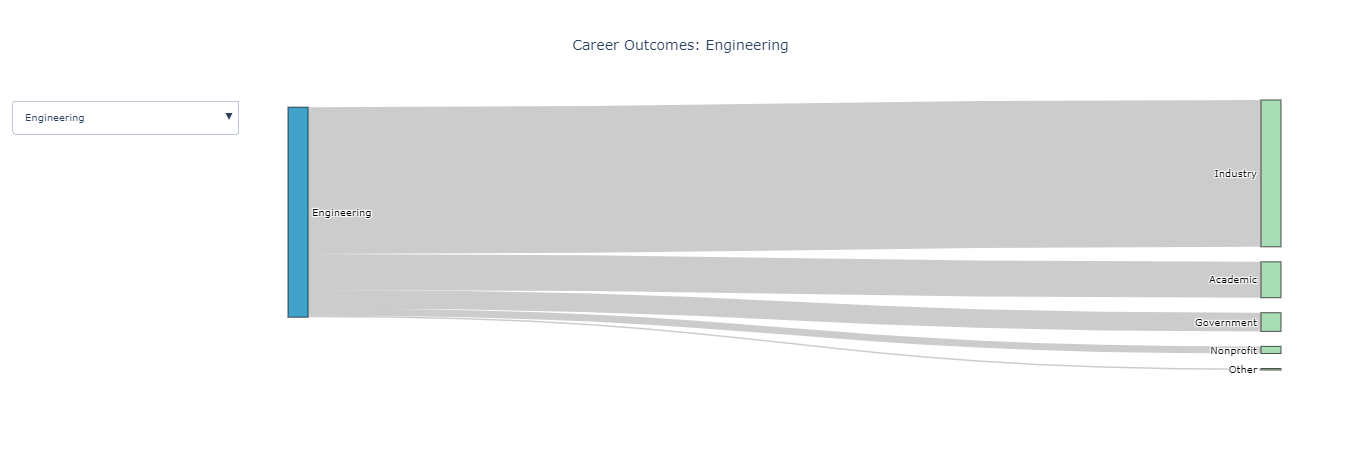

In [13]:
# Generating DFs for different filter options

def subset_sankey(df, field):
    subset = genSankey(df[df['Field']== field],cat_cols=['Field','Sector'],value_cols='Number',title='Career Outcomes: ' + field)
    return(subset)
engineering = subset_sankey(sankey, 'Engineering')
physical = subset_sankey(sankey, 'Physical sciences and earth sciences')
mathematics = subset_sankey(sankey, 'Mathematics and computer sciences')
life = subset_sankey(sankey, 'Life sciences')
psychology = subset_sankey(sankey, 'Psychology and social sciences')
other = subset_sankey(sankey, 'Other Field')
humanities =  subset_sankey(sankey, 'Humanities and arts')
education =  subset_sankey(sankey, 'Education')

# Constructing menus

updatemenus = [{'buttons' : [{'method': 'animate',
                             'label': 'Engineering',
                             'args': [engineering]},
                            {'method': 'animate',
                             'label': 'Physical Sciences and Earth Science',
                             'args': [physical]
                             },
                            {'method': 'animate',
                             'label': 'Life sciences',
                             'args': [life]
                             },
                            {'method': 'animate',
                             'label': 'Psychology and Social Sciences',
                             'args': [psychology]
                             },
                            {'method': 'animate',
                             'label': 'Other',
                             'args': [other]
                             },
                            {'method': 'animate',
                             'label': 'Humanities and Arts',
                             'args': [humanities]
                             },
                            {'method': 'animate',
                             'label': 'Education',
                             'args': [education]
                             },
                            {'method': 'animate',
                             'label': 'Mathematics and Computer Sciences',
                             'args': [mathematics]
                             },  
                            ],  }]

# update layout with buttons, and show the figure
sank = subset_sankey(sankey, 'Engineering')
fig = go.Figure(sank)
fig.update_layout(updatemenus=updatemenus)

In [31]:
py.plot(fig, title = 'Career Outcomes')

'https://plotly.com/~joekrinke15/10/'